# Extract vegetation variables times series 



## Setup Environment

In [1]:
# Provide your GEE authentificaton
import ee
ee.Authenticate()
ee.Initialize()

In [73]:
import LEAF
import SL2PV0 
import SL2PV1
import numpy as np

In [3]:
#--ServerApp.iopub_data_rate_limit=3000000.0

## Specify Sites to Process

Sites correspond to readable Google Earth Engine Feature collections under which samples will be extracted.
If the features have time stamps as properties the sampling interval can be restricted on a feature by feature basis.
Otherwise the sampling interval must be specified the same for all features.

In [4]:
# List of GEE feature collections
siteList=["projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed"]

In [5]:
datapath='C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/LS_SL2PV0_spatialbuffer45/'

## Run LEAF 

### Sample Surface Reflectance from various sensors over sites

In [6]:
sitesDictionaryL08LAI = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 30,\
                                                bufferTemporalSize =["2018-01-01","2023-12-31"],  \
                                                subsamplingFraction = 0.99,\
                                                outputFileName=datapath,\
                                                feature_range=[0,5])

STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2
Site:  projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed  with  14141  features.
Output path: C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/LS_SL2PV0_spatialbuffer45/NEON_2013-22_RMs_updated_parsed_LAI_0_5_2024_01_10_13h_01mn_49s.pkl
Data sampeling for features: from 0 to 5
Feature n°: 4/5  -- startDate: 2018-01-01 00:00:00 -- endDate: 2023-12-31 00:00:00
DONE LEAF SITE



In [18]:
sitesDictionaryS2LAI = LEAF.sampleSites(siteList, \
                                                imageCollectionName='COPERNICUS/S2_SR_HARMONIZED',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 30,\
                                                bufferTemporalSize =["2018-01-01","2023-12-31"],  \
                                                subsamplingFraction = 0.99,\
                                                outputFileName=datapath,\
                                                feature_range=[0,5])

STARTING LEAF IMAGE for  COPERNICUS/S2_SR_HARMONIZED
Site:  projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed  with  14141  features.
Output path: C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/LS_SL2PV0_spatialbuffer45/NEON_2013-22_RMs_updated_parsed_LAI_0_5_2024_01_10_14h_01mn_51s.pkl
Data sampeling for features: from 0 to 5
Feature n°: 4/5  -- startDate: 2018-01-01 00:00:00 -- endDate: 2023-12-31 00:00:00
DONE LEAF SITE



### I

## Visualize Results

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
def format_feature(feat):
    D=dict()
    for key in feat.keys():
        cols=list(feat[key][0].keys())
        A=[feat[key][ii][cols[0]] for ii in range(len(feat[key]))]
        B=[feat[key][ii][cols[1]] for ii in range(len(feat[key]))]
        for ii in range(len(feat[key])):
            A[ii]['SL2P_estimate']=B[ii]
        D.update({key:A}) 
    return D

In [101]:
sitesDictionaryL08LAI=format_feature(sitesDictionaryL08LAI)

In [115]:
sites=list(sitesDictionaryL08LAI.keys())
sites

['projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed']

In [117]:
df0=pd.DataFrame(sitesDictionaryL08LAI[sites[0]])

In [123]:
vtypes=np.unique(dfout['nlcd'])
df1=df0[df0['nlcd']==vtypes[0]]


0                  date  QC  longitude   latitude  ...
1                  date  QC  longitude   latitude  ...
3                  date  QC  longitude   latitude  ...
Name: SL2P_estimate, dtype: object

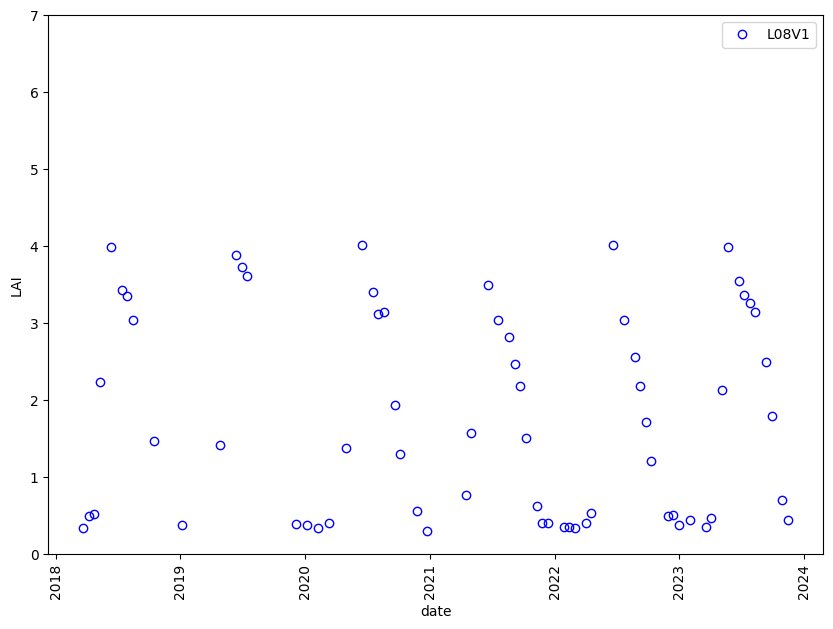

In [136]:
# Choose a site from the sitelist 
siteNum=0 
featureNum = 0
pixelNum=3

#Extract time series of LAI with high quality only
df=df1['SL2P_estimate'][featureNum]
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL08V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & (df['QC']==0)]

# #Extract time series of LAI with high quality only
# site = sitesDictionaryS2LAI[siteList[siteNum]]
# df=site[featureNum]['SL2PV0']
# df['utc'] =  pd.to_datetime(df['date'],unit='ms')
# pixelS2V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & (df['QC']==0)]

fig,ax = plt.subplots(1,1,figsize=[10,7])
plt.plot(pixelL08V0['utc'],pixelL08V0['estimateLAI'],'ob',markerfacecolor='none', label='L08V1')
# plt.plot(pixelS2V0['utc'],pixelS2V0['estimateLAI'],'or',markerfacecolor='none', label='S28V1')

ax.legend()
ax.set_ylim([0,7])
ax.set_xlabel('date')
ax.set_ylabel('LAI')
plt.xticks(rotation=90);

In [137]:
df.loc[pixelNum].longitude

-95.19060345863528